In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from keras.models import Model
from tensorflow.keras.utils import to_categorical
from keras.layers import Flatten, Dense
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
import os
print(os.listdir('./drive/MyDrive/Final_MultiClass_Data/Train_data'))
print(os.listdir('./drive/MyDrive/Final_MultiClass_Data/Test_data'))

['1', '0', '2']
['2', '0', '1']


In [ ]:
# generate test set
def generate_dataset(path):
  data_train = []
  labels_train = []
  label_out = [0,1,2]
  # path = './drive/MyDrive/Final_Data_EDL/{}/Good/Good_training'
  for items in label_out:
    path_new = path.format(items)
    for i,images in enumerate(os.listdir(path_new)):
      print(i/len(os.listdir(path_new)))
      if images=='output':
        continue
      else:
        image_act = cv2.imread(path_new+'/' + images)
        image_act = cv2.resize(image_act, (224, 224))
        data_train.append(image_act)
        labels_train.append(items)
  return data_train, labels_train

In [ ]:
path_test = './drive/MyDrive/Final_MultiClass_Data/Test_data/{}'
data_test, labels_test = generate_dataset(path_test)

0.0
0.029411764705882353
0.058823529411764705
0.08823529411764706
0.11764705882352941
0.14705882352941177
0.17647058823529413
0.20588235294117646
0.23529411764705882
0.2647058823529412
0.29411764705882354
0.3235294117647059
0.35294117647058826
0.38235294117647056
0.4117647058823529
0.4411764705882353
0.47058823529411764
0.5
0.5294117647058824
0.5588235294117647
0.5882352941176471
0.6176470588235294
0.6470588235294118
0.6764705882352942
0.7058823529411765
0.7352941176470589
0.7647058823529411
0.7941176470588235
0.8235294117647058
0.8529411764705882
0.8823529411764706
0.9117647058823529
0.9411764705882353
0.9705882352941176
0.0
0.03333333333333333
0.06666666666666667
0.1
0.13333333333333333
0.16666666666666666
0.2
0.23333333333333334
0.26666666666666666
0.3
0.3333333333333333
0.36666666666666664
0.4
0.43333333333333335
0.4666666666666667
0.5
0.5333333333333333
0.5666666666666667
0.6
0.6333333333333333
0.6666666666666666
0.7
0.7333333333333333
0.7666666666666667
0.8
0.8333333333333334
0.8

In [ ]:
# normalize the data
data_test = np.array(data_test, dtype='float')/255.0

In [ ]:
data_test[0].shape

(224, 224, 3)

In [ ]:
labels_test[0]

0

In [ ]:
# convert to categorical
labels_test = to_categorical(labels_test, 3)

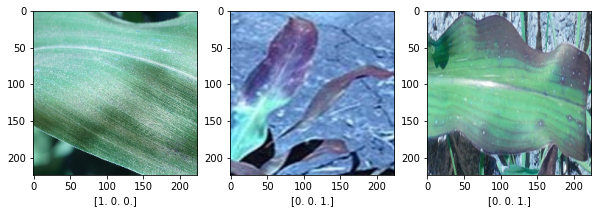

In [ ]:
import random
length = len(labels_test)
import matplotlib.pyplot as plt
index = [8, length -6, length - 10]
fig = plt.figure(figsize=(10, 7)) 
for inu, i in enumerate(index):  
  # plt.imshow(data_test[i])
  fig.add_subplot(2, 3, inu+1)
  plt.imshow(data_test[i]) 
  plt.xlabel(str(labels_test[i]))

In [ ]:
from keras.models import load_model
model_out_load = load_model('./drive/MyDrive/EDL Resources/Trained Weights For Multi Class Classification/3 Class parallel/3_Class_Classification__resnet50.hdf5')

In [ ]:
import numpy as np
import time
start = time.time()
Data = []
for inu, i in enumerate(index):
  input_data  = data_test[i].reshape(1, 224, 224, 3)
  output = model_out_load.predict(input_data)
  if output[0][0] >= output[0][1] and output[0][0] >= output[0][2]:
    Data.append(f"Healty with P = {output[0][0]}");
  elif output[0][1] >= output[0][0] and output[0][1] >= output[0][2]:
    Data.append(f"NK Def. with P = {output[0][1]}");
  else:
    Data.append(f"Phos Def. with P = {output[0][2]}");
  out_label = np.argmax(output, axis = 1)
end = time.time()
print(f"Process Time per image is {(end-start)/3}")

Process Time per image is 0.1617272694905599


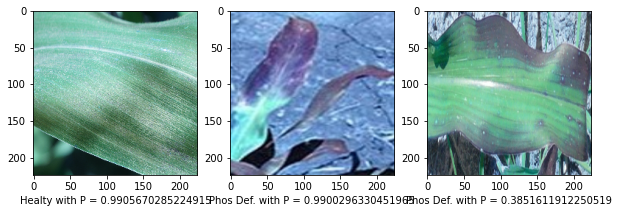

In [ ]:
fig = plt.figure(figsize=(10, 7)) 
for inu, i in enumerate(index):  
  # plt.imshow(data_test[i])
  fig.add_subplot(2, 3, inu+1)
  plt.imshow(data_test[i]) 
  plt.xlabel(Data[inu])